In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Initialize lists to store data
product_names = []
product_prices = []
product_urls = []
categories = []

# Specify the base URL of Nike's Women's Shoes section
base_url = 'https://www.nike.com/w/womens-shoes-5e1x6zy7ok'

# Specify the number of pages to scrape (13 pages)
num_pages_to_scrape = 40

# Send HTTP GET requests to scrape data from each page
for page in range(1, num_pages_to_scrape + 1):
    page_url = f'{base_url}?p={page}'  # URL for the current page

    # Send an HTTP GET request to the current page URL
    page_response = requests.get(page_url)

    # Check if the request was successful (status code 200)
    if page_response.status_code == 200:
        page_soup = BeautifulSoup(page_response.text, 'html.parser')

        # Find product elements on the current page
        product_elements = page_soup.find_all('div', class_='product-card')

        # Loop through product elements and extract data
        for product_element in product_elements:
            # Extract product name
            product_name = product_element.find('div', class_='product-card__title').text.strip()

            # Extract product price
            product_price = product_element.find('div', class_='product-price').text.strip()

            # Extract product URL
            product_url =  product_element.find('a', class_='product-card__link-overlay')['href']

            # Categorize products as "Women's Shoes"
            category = "Women's Shoes"

            # Append data to lists
            product_names.append(product_name)
            product_prices.append(product_price)
            product_urls.append(product_url)
            categories.append(category)
    else:
        print(f"Failed to fetch page {page}. Status code: {page_response.status_code}")

# Create a DataFrame to structure the data
data = {
    'Product Name': product_names,
    'Product Price': product_prices,
    'Product URL': product_urls,
    'Category': categories
}
df = pd.DataFrame(data)

# Display the first 260 rows of the DataFrame
print(df.head(1000))

# Save the DataFrame as a CSV file
df.to_csv('nike_womens_shoes.csv', index=False)

print("CSV file 'nike_womens_shoes.csv' has been saved.")


                      Product Name Product Price  \
0                 Nike Gamma Force           $95   
1          Nike Air Huarache Craft          $130   
2        Nike Dunk Low Next Nature          $110   
3      Nike Air Max 97 Next Nature          $190   
4    Nike Pegasus Trail 4 GORE-TEX          $160   
..                             ...           ...   
955                   Nike V2K Run          $110   
956           Nike Air Force 1 '07          $115   
957                Nike Air Max 90          $130   
958                Nike Pegasus 40          $130   
959               Nike Wildhorse 8          $140   

                                           Product URL       Category  
0    https://www.nike.com/t/gamma-force-womens-shoe...  Women's Shoes  
1    https://www.nike.com/t/air-huarache-craft-wome...  Women's Shoes  
2    https://www.nike.com/t/dunk-low-next-nature-wo...  Women's Shoes  
3    https://www.nike.com/t/air-max-97-next-nature-...  Women's Shoes  
4    https://ww

In [52]:
import pandas as pd


# Number of rows and columns in the dataset
num_rows, num_columns = df.shape

# List of column names (attributes)
column_names = df.columns.tolist()

# Data types of columns
column_data_types = df.dtypes

# Summary statistics (mean, standard deviation, min, max, etc.) for numeric columns
summary_statistics = df.describe()

# Number of missing values in each column
missing_values = df.isnull().sum()

# Unique values in each column
unique_values = df.nunique()

# Print key characteristics
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Column names: {column_names}")
print("Summary statistics for numeric columns:\n", summary_statistics)
print("Number of missing values in each column:\n", missing_values)
print("Number of unique values in each column:\n", unique_values)


Number of rows: 960
Number of columns: 4
Column names: ['Product Name', 'Product Price', 'Product URL', 'Category']
Summary statistics for numeric columns:
             Product Name Product Price  \
count                960           960   
unique                24            15   
top     Nike Gamma Force          $130   
freq                  40           160   

                                              Product URL       Category  
count                                                 960            960  
unique                                                 24              1  
top     https://www.nike.com/t/gamma-force-womens-shoe...  Women's Shoes  
freq                                                   40            960  
Number of missing values in each column:
 Product Name     0
Product Price    0
Product URL      0
Category         0
dtype: int64
Number of unique values in each column:
 Product Name     24
Product Price    15
Product URL      24
Category          1
dtype

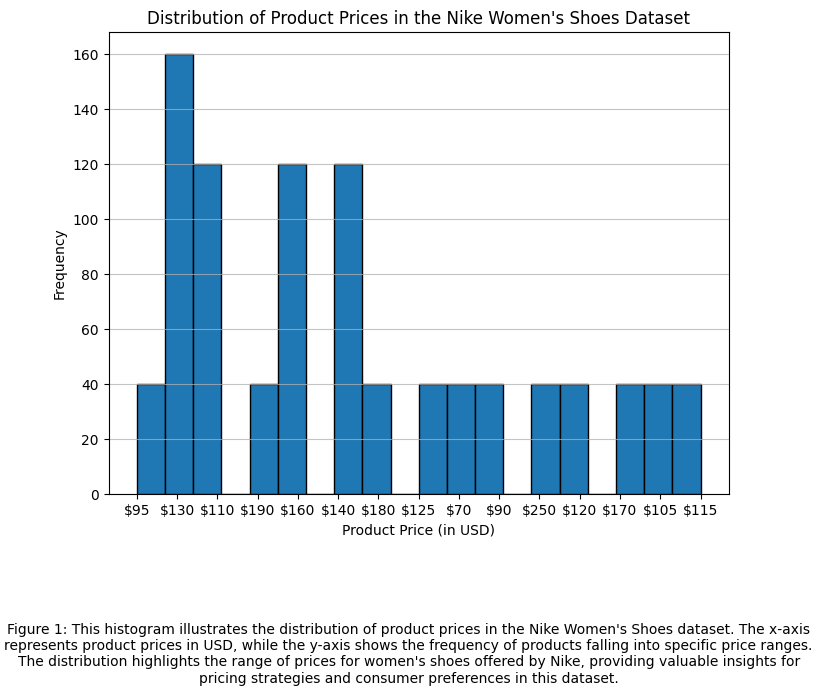

In [55]:
import matplotlib.pyplot as plt

# Load your Nike dataset (replace 'nike_womens_shoes.csv' with the actual file path)
df = pd.read_csv('nike_womens_shoes.csv')

# Extract the 'Product Price' column
product_prices = df['Product Price']

# Create a histogram for product prices
plt.figure(figsize=(8, 6))
plt.hist(product_prices, bins=20, edgecolor='black')
plt.xlabel('Product Price (in USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices in the Nike Women\'s Shoes Dataset')

# Add a description for the histogram
plt.figtext(0.5, -0.2,
    'Figure 1: This histogram illustrates the distribution of product prices in the Nike Women\'s Shoes dataset. The x-axis represents product prices in USD, while the y-axis shows the frequency of products falling into specific price ranges. The distribution highlights the range of prices for women\'s shoes offered by Nike, providing valuable insights for pricing strategies and consumer preferences in this dataset.',
    wrap=True, horizontalalignment='center', fontsize=10)

plt.grid(axis='y', alpha=0.75)
plt.show()
